#### Algorithm Evaluation
* Purpose is to select which is best algo for given specific dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

#### Read the dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

#### Create X and Y (Seperate dependent and independent features)

In [9]:
x = df.drop(columns=['PassengerId','Name','Ticket','Survived'])
y = df[['Survived']]

In [10]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#### Cat Con Seperation


In [12]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [13]:
cat

['Sex', 'Cabin', 'Embarked']

In [14]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
cat1 = ['Sex','Embarked']
cat2 = ['Cabin']

#### Build a Pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
# Numerical Pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])
# Categorical Pipeline 1
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Categorical Pipeline 2
cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Combine Pipeline with column transformer
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [18]:
x_pre = pre.fit_transform(x).toarray()
x_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

In [19]:
cols = pre.get_feature_names_out()

In [20]:
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Sex_female', 'cat1__Sex_male', 'cat1__Embarked_C',
       'cat1__Embarked_Q', 'cat1__Embarked_S', 'cat2__Cabin_A10',
       'cat2__Cabin_A14', 'cat2__Cabin_A16', 'cat2__Cabin_A19',
       'cat2__Cabin_A20', 'cat2__Cabin_A23', 'cat2__Cabin_A24',
       'cat2__Cabin_A26', 'cat2__Cabin_A31', 'cat2__Cabin_A32',
       'cat2__Cabin_A34', 'cat2__Cabin_A36', 'cat2__Cabin_A5',
       'cat2__Cabin_A6', 'cat2__Cabin_A7', 'cat2__Cabin_B101',
       'cat2__Cabin_B102', 'cat2__Cabin_B18', 'cat2__Cabin_B19',
       'cat2__Cabin_B20', 'cat2__Cabin_B22', 'cat2__Cabin_B28',
       'cat2__Cabin_B3', 'cat2__Cabin_B30', 'cat2__Cabin_B35',
       'cat2__Cabin_B37', 'cat2__Cabin_B38', 'cat2__Cabin_B39',
       'cat2__Cabin_B4', 'cat2__Cabin_B41', 'cat2__Cabin_B42',
       'cat2__Cabin_B49', 'cat2__Cabin_B5', 'cat2__Cabin_B50',
       'cat2__Cabin_B51 B53 B55', 'cat2__Cabin_B57 B59 B63 B66',
       'cat2__Cabin_B58 B60',

In [21]:
x_pre = pd.DataFrame(x_pre, columns=cols)
x_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Sex_female,cat1__Sex_male,cat1__Embarked_C,cat1__Embarked_Q,cat1__Embarked_S,...,cat2__Cabin_F E69,cat2__Cabin_F G63,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_unknown
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=21)

In [24]:
xtrain.shape

(712, 158)

In [25]:
xtest.shape

(179, 158)

#### Evaluate Algorithms

if dataset size is bigger you can ignore SVM and KNN 
(These algorithms are slow and less effective on larger dataset)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [30]:
dct = {'LogisticRegression': LogisticRegression(),
       'DecisionTree' : DecisionTreeClassifier(),
       'RandomForest' : RandomForestClassifier(),
       'GradientBoosting' : GradientBoostingClassifier()}

In [33]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier())])

In [29]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

tr = []
tr_cv = []
ts = []

for name,model in dtc.items():
    # Fit the model on training data
    model.fit(xtrain,ytrain)
    
    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    
    # Calculate F1 scores Training
    f1_tr = f1_score(ytrain,ypred_tr)
    
    # Calculate F1 Score validated results
    score = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    f1_tr_cv = score.mean()
    
    # Calculate F1 Score in testing
    f1_ts = f1_score(ytest,ypred_ts)
    
    # Append all values in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)
    
    # Print the results
    print(f'Model Name : {name}\n')
    print(f'F1 Training : {f1_tr:.4f}')
    print(f'F1 Training CV : {f1_tr_cv:.4f}')
    print(f'F1 Testing : {f1_ts:.4f}')
    print('\n====================================================\n')

Model Name : LogisticRegression

F1 Training : 0.7672
F1 Training CV : 0.7131
F1 Testing : 0.7746


Model Name : DecisionTree

F1 Training : 0.9849
F1 Training CV : 0.7106
F1 Testing : 0.7183


Model Name : RandomForest

F1 Training : 0.9849
F1 Training CV : 0.7219
F1 Testing : 0.7737


Model Name : GradientBoosting

F1 Training : 0.8606
F1 Training CV : 0.7397
F1 Testing : 0.7820




#### Create a dataframe for model evaluation


In [34]:
dct_eval = {'Name' : list(dct.keys()),
            'TrainF1' : tr,
            'TrainF1CV' : tr_cv,
            'TestF1' : ts}

In [35]:
dct_eval = pd.DataFrame(dct_eval)
dct_eval

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.767176,0.713137,0.774648
1,DecisionTree,0.984906,0.710569,0.718310
2,RandomForest,0.984906,0.721903,0.773723
3,GradientBoosting,0.860606,0.739662,0.781955


In [36]:
dct_eval.sort_values(by='TestF1',ascending=False)

,Name,TrainF1,TrainF1CV,TestF1
3,GradientBoosting,0.860606,0.739662,0.781955
0,LogisticRegression,0.767176,0.713137,0.774648
2,RandomForest,0.984906,0.721903,0.773723
1,DecisionTree,0.984906,0.710569,0.718310


#### Select the GradientBoosting model

In [37]:
params = {'learning_rate' : [0.001,0.01,0.05,0.1],
          'n_estimators' : [10,50,100,200],
          'max_depth' : [3,4,5,6,7,8,9,10],
          'min_samples_split' : [6,7,8,9,10]}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier(random_state=21)
rscv = RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1',random_state=21)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [6, 7, 8, 9, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=21, scoring='f1')

In [39]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'max_depth': 4,
 'learning_rate': 0.05}

In [40]:
rscv.best_score_

0.7316035386865861

In [41]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.05, max_depth=4,
                           min_samples_split=10, n_estimators=200,
                           random_state=21)

#### Evaluate best model

In [42]:
best_gbc.score(xtrain,ytrain)

0.9143258426966292

In [43]:
best_gbc.score(xtest,ytest)

0.8324022346368715

#### Predict train test data

In [44]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [45]:
ypred_tr[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [46]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [47]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [48]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


#### Create a confusion matrix

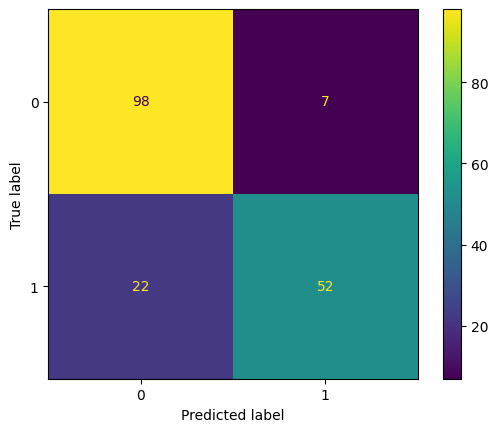

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cfd.plot()

#### Print classification report on test data

In [50]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       105
           1       0.88      0.70      0.78        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



#### Calculating ROC - AUC Score

In [51]:
yprob_tr = best_gbc.predict_proba(xtrain)[:,1]
yprob_ts = best_gbc.predict_proba(xtest)[:,1]

In [52]:
yprob_tr[0:5]

array([0.19110648, 0.74816997, 0.74758048, 0.93957854, 0.11054098])

In [53]:
yprob_ts[0:5]

array([0.5759259 , 0.10518966, 0.10518966, 0.58987327, 0.12509407])

In [54]:
# Check ROC AUC score in training
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain,yprob_tr)

0.9321382950114293

In [55]:
# Check ROU AUC Score in testing
roc_auc_score(ytest,yprob_ts)

0.8842342342342343

#### Plot the ROC AUC Score

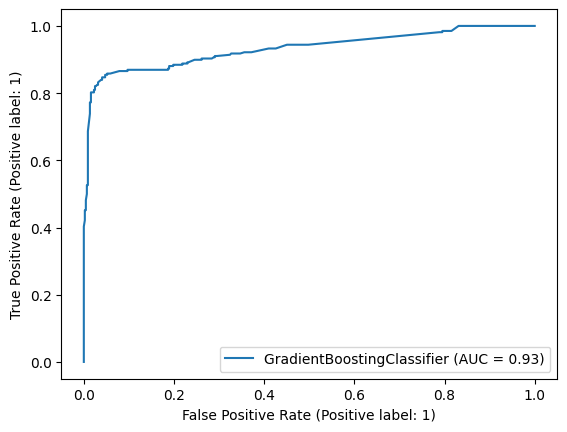

In [56]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_gbc,xtrain,ytrain)

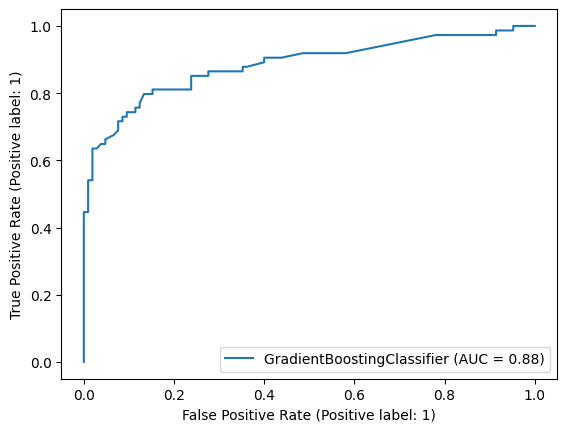

In [58]:
RocCurveDisplay.from_estimator(best_gbc,xtest,ytest)

#### Predict the test_titanic data

In [59]:
xnew = pd.read_csv('test_titanic.csv')
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
xnew_pre = pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ]])

In [61]:
xnew_pre = pd.DataFrame(xnew_pre,columns=cols)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Sex_female,cat1__Sex_male,cat1__Embarked_C,cat1__Embarked_Q,cat1__Embarked_S,...,cat2__Cabin_F E69,cat2__Cabin_F G63,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_unknown
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,-1.566107,0.740711,-0.474545,-0.473674,1.544246,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.827377,0.702286,-0.474545,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
# Predict values
preds = best_gbc.predict(xnew_pre)
probs = best_gbc.predict_proba(xnew_pre)[:,1]

In [63]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [64]:
probs[0:5]

array([0.11306483, 0.48632065, 0.10310204, 0.10518966, 0.40961921])

#### Creating results in new dataframe

In [65]:
df_res = xnew[['PassengerId']]
df_res

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [66]:
df_res['Survived'] = preds
df_res['probability'] = probs

In [67]:
df_res

,PassengerId,Survived,probability
0,892,0,0.113065
1,893,0,0.486321
2,894,0,0.103102
3,895,0,0.105190
4,896,0,0.409619
...,...,...,...
413,1305,0,0.105190
414,1306,1,0.949044
415,1307,0,0.082618
416,1308,0,0.105190


<Axes: xlabel='Survived'>

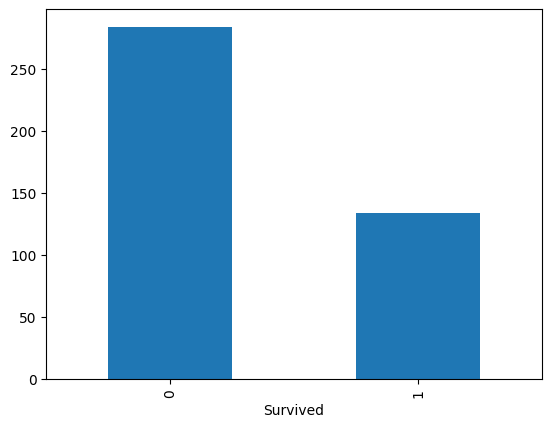

In [68]:
df_res['Survived'].value_counts().plot(kind='bar')

In [69]:
df_res.to_csv('results.csv',index = False)